<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginners Guide to Logistic Regression in Python


References:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit


Create Environment by importing necessary libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style('darkgrid')

Load a binary classification data and its metadata

In [2]:
raw_data = load_breast_cancer()

raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Read Description

In [3]:
print(raw_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
data = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
target = pd.Series(raw_data['target'], name='target')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
merge = pd.concat([data, target], axis=1)
merge.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Plot the data to understand inter-relationship

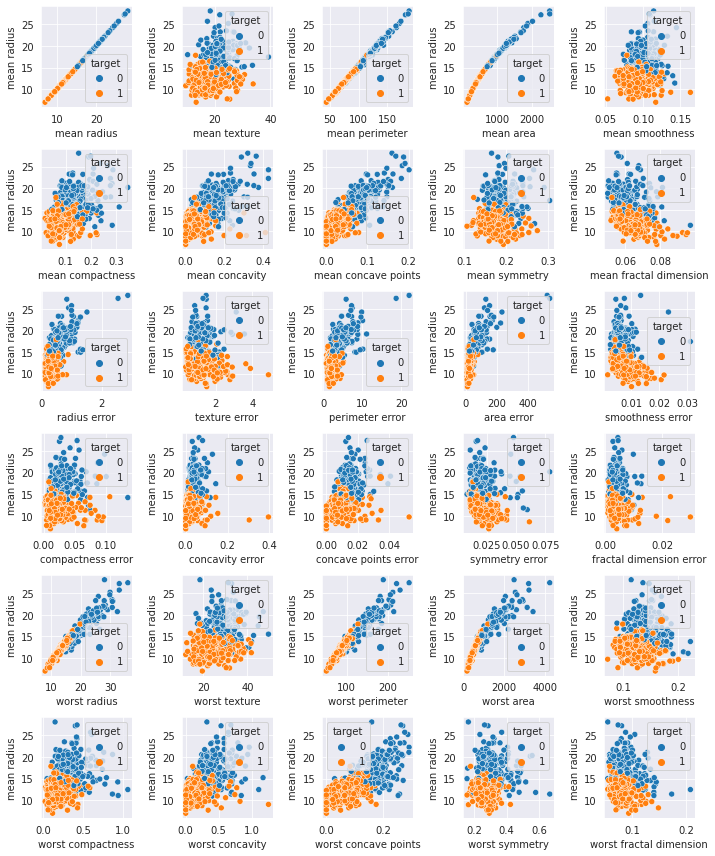

In [6]:
columns = list(data.columns)
plt.figure(figsize=(10,12))
k=1
for col in columns:
  plt.subplot(6,5,k)
  sns.scatterplot(x=col, y='mean radius', hue='target', data=merge)
  k+=1
plt.tight_layout()
plt.show()

Select a few independent features to proceed

In [7]:
# selected features
features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity']

X = data[features]
y = target.copy()
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity
0,17.99,10.38,0.11840,0.27760,0.3001
1,20.57,17.77,0.08474,0.07864,0.0869
2,19.69,21.25,0.10960,0.15990,0.1974
3,11.42,20.38,0.14250,0.28390,0.2414
4,20.29,14.34,0.10030,0.13280,0.1980


Split the data into Train and Validation set

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=6)


# Logistic Regression using statsmodels library

In [9]:
from statsmodels.api import Logit, add_constant

# add intercept manually
X_train_const = add_constant(X_train)
# build model and fit training data
model_1 = Logit(y_train, X_train_const).fit()
# print the model summary
model_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.131567
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      449
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 May 2021   Pseudo R-squ.:                  0.7954
Time:                        14:09:28   Log-Likelihood:                -59.863
converged:                       True   LL-Null:                       -292.53
Covariance Type:            nonrobust   LLR p-value:                 2.429e-98
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.4207      5.769      7.353      0.000      31.113      53.729
mean radius         -1.3898      0.199     -6.972      0.000      -1.781      -0.999
mean texture        -0.3925      0.070     -5.630      0.000      -0.529      -0.256
mean smoothness   -144.5298     28.904     -5.000      0.000    -201.181     -87.879
mean compactness    17.9519     10.278      1.747      0.081      -2.192      38.096
mean concavity     -25.5892      6.044     -4.234      0.000     -37.436     -13.742
====================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

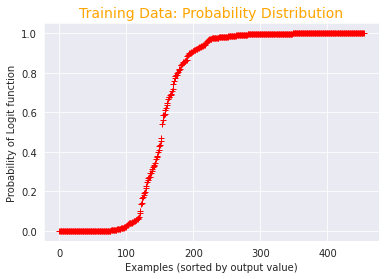

In [10]:
# Probability Distribution for Training data
prob_train = model_1.predict(X_train_const)

# sort the prob dist for visualization
sorted_train = sorted(prob_train.values)
index_train = np.arange(len(sorted_train))
# plot it
plt.plot(index_train, sorted_train, '+r')
plt.title('Training Data: Probability Distribution', size=14, color='orange')
plt.xlabel('Examples (sorted by output value)')
plt.ylabel('Probability of Logit function')
plt.show()

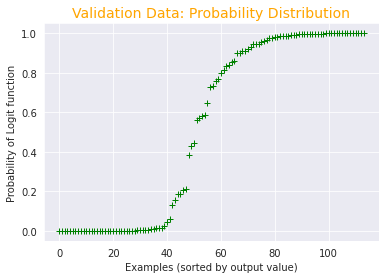

In [11]:
# Probability Distribution for Validation data
X_val_const = add_constant(X_val)
prob_val = model_1.predict(X_val_const)

sorted_val = sorted(prob_val.values)
index_val = np.arange(len(sorted_val))
plt.plot(index_val, sorted_val, '+g')
plt.title('Validation Data: Probability Distribution', size=14, color='orange')
plt.xlabel('Examples (sorted by output value)')
plt.ylabel('Probability of Logit function')
plt.show()

In [12]:
threshold = 0.5
y_pred = (prob_val > threshold).astype(np.int8)

In [13]:
metrics.accuracy_score(y_val,y_pred)

0.9210526315789473

In [18]:
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        56
           1       0.89      0.97      0.93        58

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [14]:
conf = pd.DataFrame(metrics.confusion_matrix(y_val,y_pred), 
                    index=['Actual Malignant', 'Actual Benign'], 
                    columns=['Predicted Malignant', 'Predicted Benign'])
conf

,Predicted Malignant,Predicted Benign
Actual Malignant,49,7
Actual Benign,2,56


In [15]:
accuracies = []
thresholds = np.arange(0.0, 1.01, 0.05)
for th in thresholds:
  y_preds = (prob_val > th).astype(np.int8)
  acc = metrics.accuracy_score(y_val,y_preds)
  accuracies.append(acc)


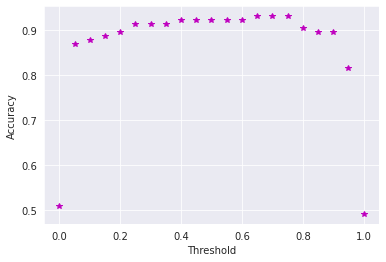

In [16]:
# plot the accuracy values
plt.plot(thresholds, accuracies, '*m')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

# Using SciKit-Learn Library


In [29]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(penalty='none')
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_val)
metrics.accuracy_score(y_val, y_pred_2)

0.9210526315789473

Evaluate the model

In [31]:
print(metrics.classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        56
           1       0.89      0.97      0.93        58

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



Find the probability distribution

In [36]:
model_2.predict_proba(X_val)

array([[9.99833772e-01, 1.66228079e-04],
       [8.15525867e-01, 1.84474133e-01],
       [6.74565624e-03, 9.93254344e-01],
       [2.85436622e-05, 9.99971456e-01],
       [9.82877656e-01, 1.71223438e-02],
       [5.58683461e-02, 9.44131654e-01],
       [1.43619612e-01, 8.56380388e-01],
       [9.99628010e-01, 3.71990354e-04],
       [3.19294195e-03, 9.96807058e-01],
       [2.09638445e-02, 9.79036156e-01],
       [3.60094663e-04, 9.99639905e-01],
       [8.78165949e-02, 9.12183405e-01],
       [1.62059064e-02, 9.83794094e-01],
       [4.13811467e-02, 9.58618853e-01],
       [9.90593647e-01, 9.40635315e-03],
       [9.98322814e-01, 1.67718595e-03],
       [2.65644961e-01, 7.34355039e-01],
       [9.99996104e-01, 3.89609608e-06],
       [2.31178732e-01, 7.68821268e-01],
       [9.99452016e-01, 5.47983729e-04],
       [5.43953366e-02, 9.45604663e-01],
       [9.90078632e-02, 9.00992137e-01],
       [8.14539829e-01, 1.85460171e-01],
       [6.16022412e-01, 3.83977588e-01],
       [9.999917

# Compare both libraries

In [37]:
# y_pred is the prediction of statsmodels library
# y_pred_2 is the prediction of sklearn libray

# Compare both libraries

(y_pred == y_pred_2).all()

True

### Thank you for your time